# Regresión Lineal: *Predecir el coste del seguro médico para una persona*


## Paso 1: Análisis exploratorio de datos (EDA)

### Exploración preliminar

In [639]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [514]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [516]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [517]:
df.duplicated().sum()

1

In [518]:
df.drop_duplicates(inplace=True)

*Conclusiones Exploracion Preliminar:*

- *Forma: 7 columnas y 1338 filas en teoría sin valores faltantes. Todas las variables tienen más de un valor único.*
- *Variables: 3 categóricas y 4 numéricas.*
- *Target: Numérica continua (coste del seguro médico para un cliente)*
- *Había 1 fila duplicada de la que hemos prescindido.*


## Análisis univariante: variables numéricas

In [519]:
# Separamos en variables numéricas y categóricas
categorical_cols = ['sex', 'smoker','region']
df_cat = df[categorical_cols]

In [520]:
df_num = df.drop(df[categorical_cols], axis = 1)

In [521]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


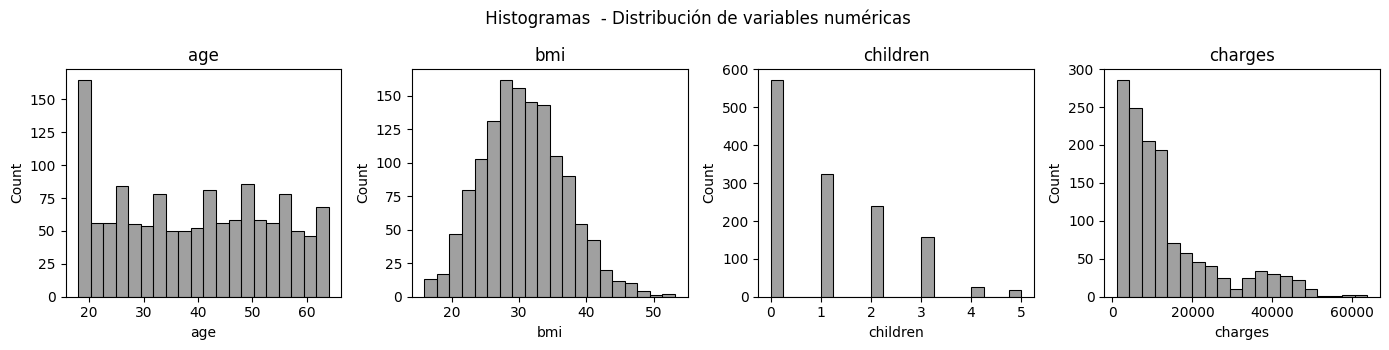

In [522]:
# Histogramas para las variables numéricas

plt.figure(figsize=(14, 6))
plt.suptitle(" Histogramas  - Distribución de variables numéricas")

for i, col in enumerate(df_num.columns): 
    plt.subplot(2, 4, i+1) 
    sns.histplot(data=df_num, x=col, bins = 20, color = 'gray') 
    plt.title(col)  

plt.tight_layout()  
plt.show()

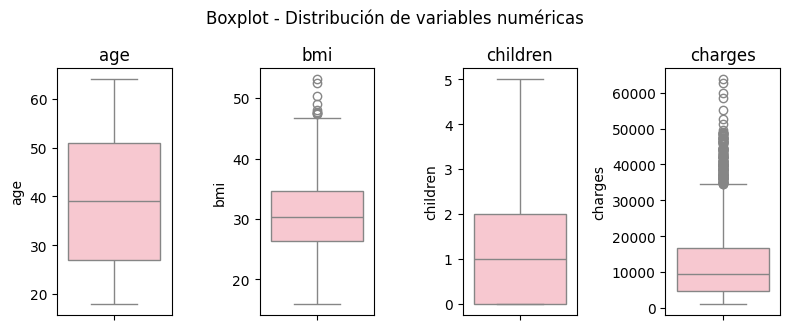

In [523]:
# Boxplots variables numéricas
plt.figure(figsize= (8, 6))
plt.suptitle("Boxplot - Distribución de variables numéricas")

for i, col in enumerate(df_num.columns):
    plt.subplot(2, 4, i+1)  
    sns.boxplot(data=df_num[col], color = 'pink')  
    plt.title(col)  

plt.tight_layout()  
plt.show()  

In [524]:
# Transformación logarítmica de la variable respuesta "charges"
df_num['log_charges'] = np.log(df_num.charges)

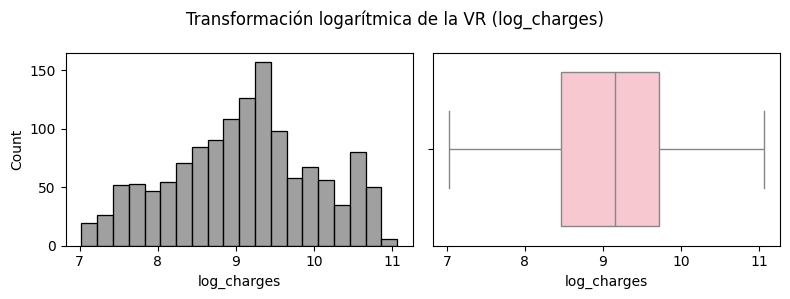

In [525]:
plt.figure(figsize = (8, 3))
plt.suptitle("Transformación logarítmica de la VR (log_charges)")

plt.subplot(1, 2, 1)
sns.histplot(data = df_num, x = "log_charges", bins = 20, color = 'gray')
plt.subplot(1, 2, 2)
sns.boxplot(data=df_num,x = 'log_charges', color = 'pink')  

plt.tight_layout()  
plt.show() 

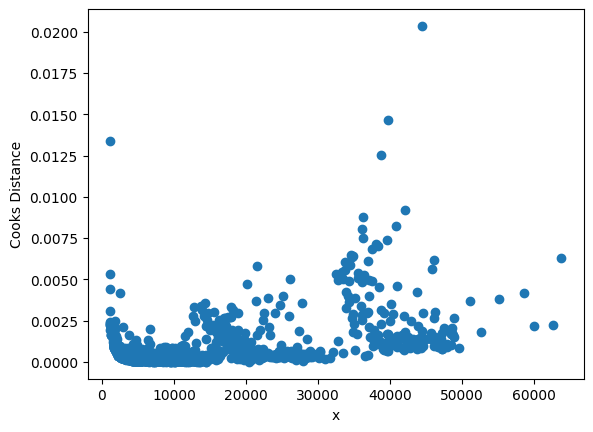

In [526]:
# Distancia de Cook - Eliminando observaciones influyentes
X = df_num.drop(['charges', 'log_charges'], axis = 1)
y = df_num['log_charges']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
cooks_distance = model.get_influence().cooks_distance

plt.scatter(df_num.charges, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [527]:
print(np.where(cooks_distance[0]> 0.0125))
df_num.iloc[802]
df_num.iloc[1046]

(array([ 802, 1046, 1155, 1316]),)


age               22.000000
bmi               52.580000
children           1.000000
charges        44501.398200
log_charges       10.703276
Name: 1047, dtype: float64

In [528]:
df_num.drop([802, 1046, 1155, 1316], axis=0, inplace=True)

In [529]:
df_cat.drop([802, 1046, 1155, 1316], axis=0, inplace=True)

/tmp/ipykernel_622/225934101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop([802, 1046, 1155, 1316], axis=0, inplace=True)


In [530]:
df_num.shape

(1333, 5)

In [531]:
df_cat.shape

(1333, 3)

In [532]:
# Skewness
df_num.apply(lambda x: x.skew())

age            0.052739
bmi            0.281803
children       0.937853
charges        1.511936
log_charges   -0.091619
dtype: float64

In [533]:
# Winsorización -  eliminamos "children" por ser numérica discreta
df_num_continuos = df_num.drop('children', axis = 1)

In [534]:
def winsorize(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

for column in df_num_continuos.columns:
    if column != 'charges' and column != 'log_charges': # No winsorizamos la variable respuesta
        df_num_continuos[column] = winsorize(df_num_continuos[column], 0.25, 0.75) 

In [535]:
df_num_continuos.apply(lambda x: x.skew())

age            0.052739
bmi            0.229770
charges        1.511936
log_charges   -0.091619
dtype: float64

In [536]:
# Transformación log + 1 para la variable discreta "children" 
df_num['log_children'] = np.log(df['children'] + 1)

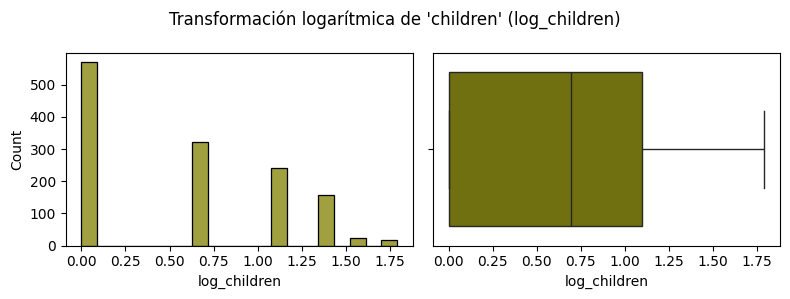

In [537]:
plt.figure(figsize = (8, 3))
plt.suptitle("Transformación logarítmica de 'children' (log_children)")

plt.subplot(1, 2, 1)
sns.histplot(data = df_num, x = "log_children", bins = 20, color = 'olive')
plt.subplot(1, 2, 2)
sns.boxplot(data=df_num,x = 'log_children', color = 'olive')  

plt.tight_layout()  
plt.show() 

In [538]:
df_num.apply(lambda x: x.skew())

age             0.052739
bmi             0.281803
children        0.937853
charges         1.511936
log_charges    -0.091619
log_children    0.262135
dtype: float64

*Conclusiones Análisis Univariante Numérico:*

- *Las columnas están completas (todos los valores 0 tienen sentido).*

- *La VR está muy sesgada hacia la derecha, por lo que aplicamos una transformación logarítmica que mejora considerablemente el resultado.*
- *Se calcula la distancia de Cook para eliminar varias observaciones influyentes.*
- *Al analizar el sesgo observamos que la variable más sesgada es "children", pero al tratarse de una variable discreta no podemos aplicar winsorización, por lo que procedemos a transformar la variable mediante "log +1", lo que mejora altamente el sesgo.*
- *Por último, al winsorizar el resto de variables numéricas (no VR) no observamos diferencia en el sesgo.*

### Análisis univariante: variables categóricas

In [539]:
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


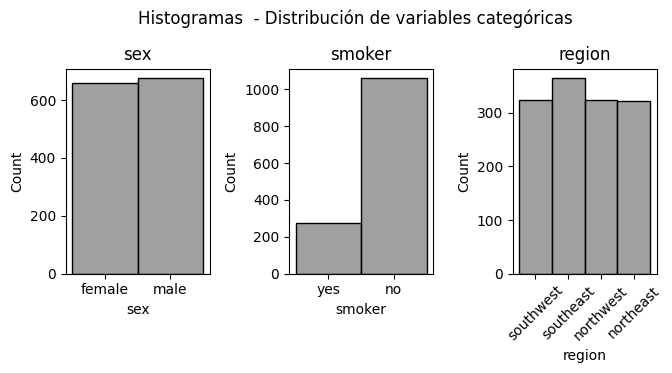

In [540]:
# Histogramas para las variables categóricas

plt.figure(figsize=(9, 6))
plt.suptitle("Histogramas  - Distribución de variables categóricas", x = 0.4) # Para centrar el título

for i, col in enumerate(df_cat.columns): 
    plt.subplot(2, 4, i+1) 
    sns.histplot(data=df_cat, x=col, color = 'gray') 
    plt.title(col)  

plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [541]:
# Pasamos a binario las variables "sex" y "smoker" (one hot - encoding)
df_bin = df_cat.replace({'sex': {'male': 1, 'female': 0}, 'smoker': {'yes': 1, 'no': 0}})
df_bin.head()

/tmp/ipykernel_622/3071999825.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bin = df_cat.replace({'sex': {'male': 1, 'female': 0}, 'smoker': {'yes': 1, 'no': 0}})


,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


In [542]:
# Hacemos one-hot enconding para "region"
df_cat_oh = pd.get_dummies(df_cat['region'], prefix='region').astype(int)

In [543]:
df_cat = pd.concat([df_bin, df_cat_oh], axis=1)

In [544]:
df_cat.drop('region', axis=1, inplace=True)

In [545]:
df_cat.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [546]:
# Creamos un df nuevo con todas las variables ya modificadas

ds = pd.concat([df_num, df_cat], axis = 1)
ds.head()

,age,bmi,children,charges,log_charges,log_children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,0.000000,0,1,0,0,0,1
1,18,33.770,1,1725.55230,7.453302,0.693147,1,0,0,0,1,0
2,28,33.000,3,4449.46200,8.400538,1.386294,1,0,0,0,1,0
3,33,22.705,0,21984.47061,9.998092,0.000000,1,0,0,1,0,0
4,32,28.880,0,3866.85520,8.260197,0.000000,1,0,0,1,0,0


*Conclusiones análisis variables categoricas:*

- *Se ha realizado one-hot encoding en las tres variables categóricas "sex", "smoker" y "region".*

## Análisis multivariante

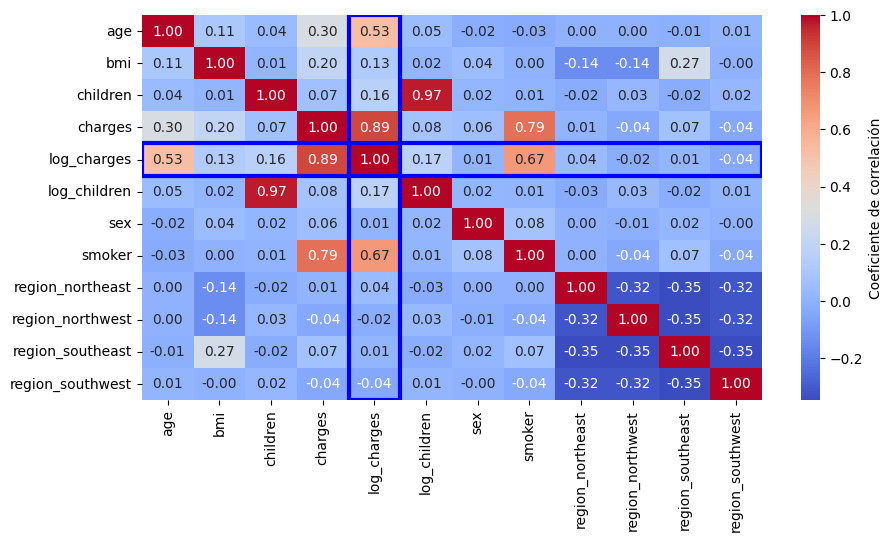

In [547]:
corr = ds.corr()

def corr_highlighted_target(corr, target):
   
    
    plt.figure(figsize=(10,5))

    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Coeficiente de correlación'})

    target_index = corr.columns.tolist().index(target)

    plt.gca().add_patch(plt.Rectangle((target_index, 0), 1, len(corr), fill=False, edgecolor='blue', lw=3))
    plt.gca().add_patch(plt.Rectangle((0, target_index), len(corr), 1, fill=False, edgecolor='blue', lw=3))

    plt.show()
   


corr_highlighted_target(corr, 'log_charges')

In [548]:
# Factor de inflación de la varianza
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index=ds.columns)
vif

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


age                   22.721380
bmi                    3.273695
children            1276.991805
charges              317.357175
log_charges          358.833012
log_children        1289.932438
sex                    1.251385
smoker                47.191466
region_northeast            inf
region_northwest            inf
region_southeast            inf
region_southwest            inf
dtype: float64

In [549]:
ds.drop(['region_northwest','region_southeast','region_southwest'], axis = 1, inplace = True)

In [550]:
corr = ds.corr()
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index=ds.columns)
vif

age                   22.576911
bmi                    2.793530
children            1271.474075
charges              315.845233
log_charges          356.029715
log_children        1284.785042
sex                    1.249475
smoker                46.474060
region_northeast       1.267784
dtype: float64

In [551]:
ds.head()

,age,bmi,children,charges,log_charges,log_children,sex,smoker,region_northeast
0,19,27.900,0,16884.92400,9.734176,0.000000,0,1,0
1,18,33.770,1,1725.55230,7.453302,0.693147,1,0,0
2,28,33.000,3,4449.46200,8.400538,1.386294,1,0,0
3,33,22.705,0,21984.47061,9.998092,0.000000,1,0,0
4,32,28.880,0,3866.85520,8.260197,0.000000,1,0,0


In [552]:
ds.drop(['charges'], axis = 1, inplace = True)

In [553]:
# Separamos en variables predictoras y variable respuesta
X = ds.drop(['log_charges'], axis=1)
y = ds['log_charges']

# Separamos en conjunto de entrenamiento y conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

model = xgb.XGBRegressor(objective='reg:squarederror')

# Entrena el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Calcula la importancia de las características
feature_importances = model.feature_importances_

# Asocia las importancias con los nombres de las características
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Ordena las características por importancia (de mayor a menor)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance}')

Feature: smoker, Importance: 0.8627878427505493
Feature: age, Importance: 0.0621921680867672
Feature: children, Importance: 0.026801422238349915
Feature: region_northeast, Importance: 0.020719019696116447
Feature: bmi, Importance: 0.014977765269577503
Feature: sex, Importance: 0.012521794997155666
Feature: log_children, Importance: 0.0


In [554]:
def get_vars_to_delete(d_imp, corr, imp_cut=0.005, corr_cut=0.1):
  ls_vars_low_corr = corr[corr.log_charges.abs()<=corr_cut].index
  return [var for var in ls_vars_low_corr if d_imp[var]<=imp_cut]

In [555]:
corr = ds.corr()
corr.log_charges

age                 0.525371
bmi                 0.129229
children            0.159747
log_charges         1.000000
log_children        0.170192
sex                 0.006505
smoker              0.665967
region_northeast    0.041771
Name: log_charges, dtype: float64

In [556]:

vars_to_drop = get_vars_to_delete(sorted_feature_importance, corr, imp_cut=0.03, corr_cut=0.5)
vars_to_drop

['bmi', 'children', 'log_children', 'sex', 'region_northeast']

In [626]:
ds

,age,bmi,children,log_charges,log_children,sex,smoker,region_northeast
0,19,27.900,0,9.734176,0.000000,0,1,0
1,18,33.770,1,7.453302,0.693147,1,0,0
2,28,33.000,3,8.400538,1.386294,1,0,0
3,33,22.705,0,9.998092,0.000000,1,0,0
4,32,28.880,0,8.260197,0.000000,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,1.386294,1,0,0
1334,18,31.920,0,7.698927,0.000000,0,0,1
1335,18,36.850,0,7.396233,0.000000,0,0,0
1336,21,25.800,0,7.604867,0.000000,0,0,0


In [558]:
dt = ds.drop(['bmi', 'children', 'log_children', 'sex', 'region_northeast'], axis = 1)

In [559]:
dt.head()

,age,log_charges,smoker
0,19,9.734176,1
1,18,7.453302,0
2,28,8.400538,0
3,33,9.998092,0
4,32,8.260197,0


*Conclusiones Análisis Multivariante:*

- *Nos decantamos por mantener únicamente las variables "age" y "smoker" ya que son las más correlacionadas con la VR (0.53 y 0.67, respectivamente), además de destacar en importancia.*
- *PREGUNTA: ¿Deben ser siempre valores de correlación muy altos para que esté justificado utilizar regresión lineal, en comparación con otros modelos?*

### Escalado de variables

In [632]:
X = dt.drop(['log_charges'], axis=1)
y = dt['log_charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 65)

In [633]:
X_train_num = X_train[['age']]
X_test_num = X_test[['age']]
bin_cols = 'smoker'

In [634]:
scaler = MinMaxScaler().fit(X_train_num)

X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler. transform(X_test_num)

In [635]:
# Unimos las variables escaladas con las binarias
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[bin_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[bin_cols].reset_index(drop=True)], axis=1)

# Paso 2: Modelizado (Regresión Lineal Múltiple)

### Summary: modelo OLS

In [680]:
# Resetemoas el índice y_train para poder utilizar el modelo OLS
y_train = y_train.reset_index(drop = True)

In [681]:
# Crear el modelo de regresión lineal
X = sm.add_constant(X_train_sc)
model = sm.OLS(y_train, X)

# Ajustar el modelo a los datos
results = model.fit()

In [682]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1548.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.34e-315
Time:                        15:49:18   Log-Likelihood:                -687.85
No. Observations:                1066   AIC:                             1382.
Df Residuals:                    1063   BIC:                             1397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0095      0.027    296.329      0.0

*Conclusiones Summary:*
- *R cuadrado: 0.744. Con la variable que tenemos, podríamos llegar a explicar entorno a un 75% de toda la variabilidad de los costes.*
- *Prob (F-statistic): Tenemos un p-valor de 1.34e-315. Muy cercano a 0. Por lo tanto, se rechaza la hipótesis nula.*
- *Varios factores nos indican que los residuos NO son normales*.



### Modelo Regresión Lineal

In [684]:
model = LinearRegression()
model.fit(X_train_sc, y_train)

LinearRegression()

In [685]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 8.009536776761692
Coeficientes (b1, b2): [1.6707507  1.54944912]


In [686]:
y_pred = model.predict(X_test_sc)
y_pred

array([ 9.42604281,  8.80859146,  9.2081188 ,  8.26378145,  9.35340147,
        9.49868414, 10.75756792,  9.35340147,  9.24443947,  9.17179813,
        9.7769099 ,  8.59066746,  8.62698812,  9.64396681,  8.08217811,
        8.40906412,  8.04585744,  9.38972214,  8.33642278,  9.46236347,
        9.28076014,  8.00953678,  9.2081188 ,  8.73595013, 11.2297366 ,
       10.17643724,  9.06283613,  8.11849878,  8.00953678,  9.02651546,
        8.95387413,  8.62698812,  9.17179813,  9.64396681, 10.24907858,
       11.04813326,  8.00953678,  9.24443947,  9.3170808 ,  9.49868414,
       11.19341593,  8.00953678,  9.5589859 ,  8.30010212,  9.17179813,
        9.64396681,  8.00953678, 10.97549193,  8.04585744,  8.15481945,
        9.02651546,  8.69962946, 10.46700258,  9.35340147,  8.73595013,
        9.0991568 ,  8.00953678,  8.00953678,  9.53500481,  9.81323057,
        9.3170808 ,  9.35340147, 10.83020926, 10.61228525,  8.95387413,
        8.84491213,  9.17179813,  9.88587191, 10.86652993,  8.55

### Métricas

In [687]:
print(f"Error cuadrático medio: {round(mean_squared_error(y_test, y_pred),3)}")
print(f"R2: {round(r2_score(y_test, y_pred),3)}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(F"MAPE:{round(mape,3)}")


Error cuadrático medio: 0.25
R2: 0.716
MAPE:0.035


*Conclusiones métricas:*

- *El 71.6% de la variabilidad del coste del seguro médico podría explicarse por las características "edad" y "condición de fumador".*
- *El valor del MAPE indica que al hacer predicciones nuestro modelo comete, de media, un 3,5% de error.*

### Pipeline: flujo del modelo y prueba 

In [688]:
def custom_transform(X):
  X_num = X.iloc[:, [0]]
  X_num_sc = scaler.transform(X_num)
  X_sc = pd.concat([pd.DataFrame(X_num_sc), X.iloc[:,[1]].reset_index(drop=True)], axis=1, ignore_index=True)

  return X_sc

# Define los pasos del pipeline
steps = [
    ('custom_transform', FunctionTransformer(func=custom_transform)),  # Paso con función personalizada
    ('model', model)  # Paso del modelo de regresión
]

# Crea el pipeline
pipeline = Pipeline(steps)

In [689]:
joblib.dump(pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']

In [690]:
loaded_pipeline = joblib.load('model_pipeline.pkl')

In [691]:
cols = ['age', 'smoker']

In [692]:
new_client_data = pd.DataFrame([[40, 1]], columns = cols)
new_client_data

,age,smoker
0,40,1


In [693]:
prediction = loaded_pipeline.predict(new_client_data)[0]

print(f'Coste seguro médico cliente: {round(np.exp(prediction),2)} €')

Coste seguro médico cliente: 31509.38 €


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Estudio Gráfico: Variables y Residuos

In [694]:
X_train_sc_reset = X_train_sc.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)
train_data = pd.concat([X_train_sc_reset, y_train_reset], axis=1)

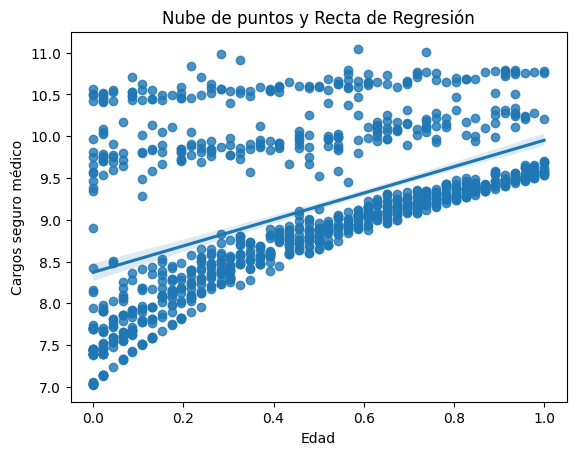

In [695]:
sns.regplot(x="age", y="log_charges", data= train_data)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Edad")
plt.ylabel("Cargos seguro médico")
plt.show()

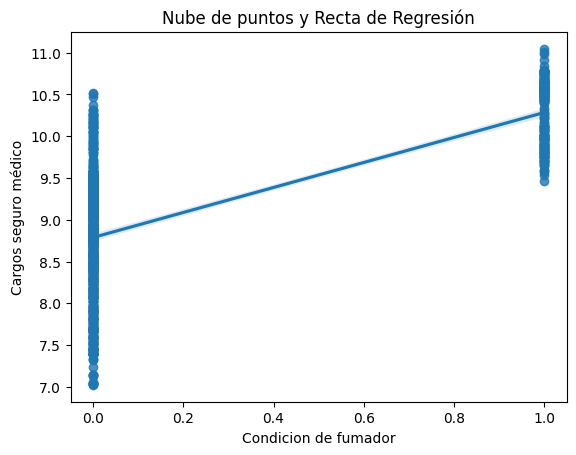

In [696]:
sns.regplot(x="smoker", y="log_charges", data = train_data)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Condicion de fumador")
plt.ylabel("Cargos seguro médico")
plt.show()

In [703]:
residuos = results.resid

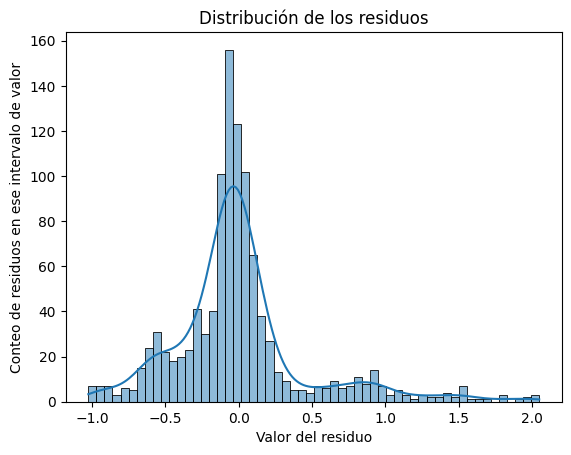

In [704]:
sns.histplot(data=residuos, kde=True, common_norm=False)

plt.title('Distribución de los residuos')
plt.xlabel('Valor del residuo')
plt.ylabel('Conteo de residuos en ese intervalo de valor')
plt.show()

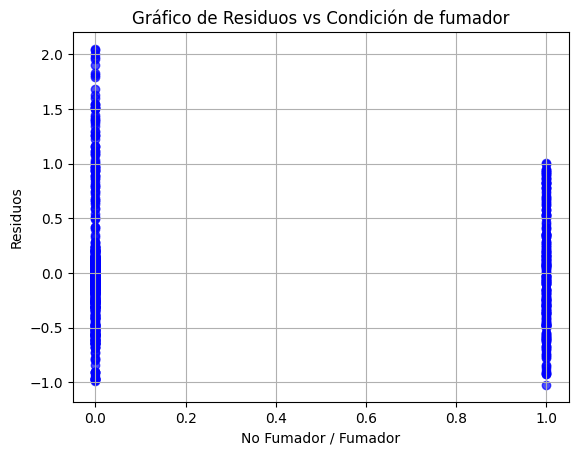

In [699]:
plt.scatter(X_train_sc['smoker'], residuos, c='blue', alpha=0.7)
plt.title('Gráfico de Residuos vs Condición de fumador')
plt.xlabel('No Fumador / Fumador')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

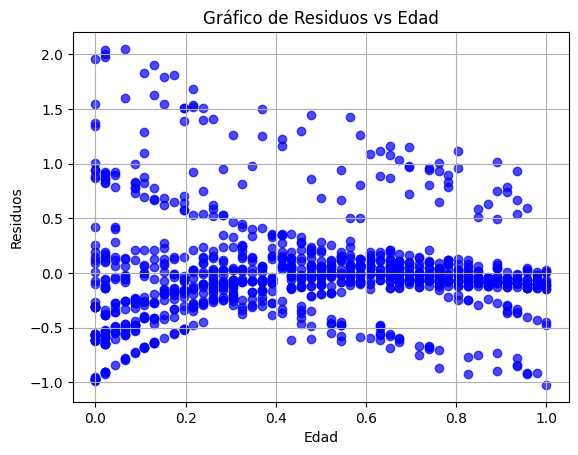

In [700]:
plt.scatter(X_train_sc['age'], residuos, c='blue', alpha=0.7)
plt.title('Gráfico de Residuos vs Edad')
plt.xlabel('Edad')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

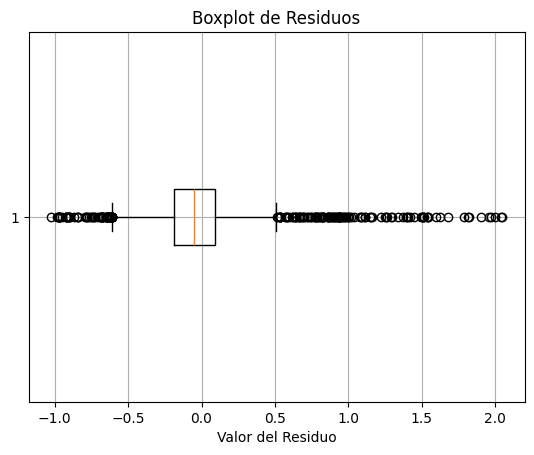

In [701]:
plt.boxplot(residuos, vert=False)
plt.title('Boxplot de Residuos')
plt.xlabel('Valor del Residuo')
plt.grid(True)

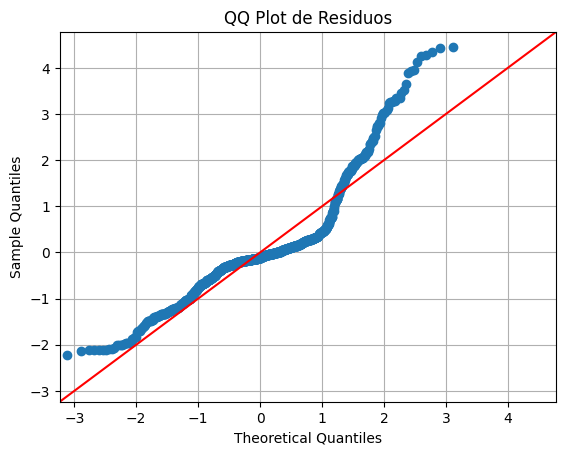

In [705]:
fig = sm.qqplot(residuos, line='45', fit=True)
plt.title('QQ Plot de Residuos')
plt.grid(True)
plt.show()